# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# read source files sat_2017.csv and act_2017.csv and assign them to panda dataframes sat_17 & act_17
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
# print first 10 rows of the 
sat_17.head(10)
act_17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

##### Answer:

<font color='brown'>SAT 2017 : Aggregated results for SATs 2017 with participation rates, scores of each section of the exam (2 sections) and the total aggregated score by each US State 

ACT 2017 : Aggregated results for ACTs 2017 with participation rates, scores of each section of the exam (4 sections) and the total aggregated score by each US State and its national averages

In [6]:
sat_17.info()
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4a. Does the data look complete? 

##### Answer: 

<font color='brown'>Data in both data frame looks complete with non-null objects for all columns. 

ACT_2017 provided national average but the same is not available in SAT_2017

In [3]:
# data checks for min and max scores for different sections of data sources
sat_17.min(axis = 0)
sat_17.max(axis = 0)
# to get the state name and rest of info  for the state with smallest Math score which is lesser than the minimum 
# allowed score
print(sat_17[sat_17.Math == sat_17.Math.min()])

       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060


In [4]:
# data checks for min and max scores for different sections of data sources
act_17.min(axis = 0)
act_17.max(axis = 0)
# to get the state name and rest of info for the state with smallest Math score which is lesser than the minimum allowed score
print(act_17[act_17.Science == act_17.Science.min()])

       State Participation  English  Math  Reading  Science Composite
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
# correct Evidence-Based Reading and Writing score for Maryland in SAT 17 data
sat_17.State
sat_17.at[20,"Math"] = 524

In [6]:
# correct Evidence-Based Reading and Writing score for Maryland in SAT 17 data
act_17.State
act_17.at[21,"Science"] = 23.2

In [7]:
# understand the data type of Participation column
type(sat_17.Participation)
sat_17.Participation.describe()
# removing % symbol from participation column to covert it to float data type and calculate the mean for national row 
sat_17.Participation = list(map(lambda x: x.rstrip('%'), sat_17.Participation.values))
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [8]:
# covert data type of Participation column to float
sat_17.Participation = [float(x) for x in sat_17.Participation.values]

In [11]:
# get basic stats of sat_17 dataframe to obtain values to be input as national average row. 
sat_17.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
# to get the data types of each of the columns in both data frames. 
sat_17.info()
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Yes, initially noted series object type for Participation column in sat_17 data frame and converted it to float for the above purpose. 
For act_17 dataframe, the issue is replicated with Participation column as well as for Composite column.
One of the rows of act_17 dataframe has 20.2x as value for Composite column too. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
# function to convert participation to float
def participation_to_float(df, column):
        df[column] = list(map(lambda x: x.rstrip('%') , df[column].values))
        df[column] = [float(x) for x in df[column].values]

In [10]:
# function to convert composite to float
def composite_to_float(df, column):
        df[column] = list(map(lambda x: x.rstrip('x'), df[column].values))
        df[column] = [float(x) for x in df[column].values]

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
# convert participation and composite columns to float type by calling the above functions
participation_to_float(act_17, 'Participation')
composite_to_float(act_17, 'Composite')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
# to check the columns of both dataframes to see if the data type looks right. 
sat_17.tail()
act_17.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2


- Display the data types again to confirm they are correct.

In [21]:
# to check the data type been changed as required - Object to float for percentage columns and composite column of 
# act_17
sat_17.info()
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [12]:
# Renaming columns
sat_17_col = ['state','sat17_participation','sat17_erw','sat17_math','sat17_total']
sat_17.columns = sat_17_col
act_17_col = ['state','act17_participation','act17_eng','act17_math','act17_read','act17_sci','act17_comp']
act_17.columns = act_17_col
sat_17.info()
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                  51 non-null object
sat17_participation    51 non-null float64
sat17_erw              51 non-null int64
sat17_math             51 non-null int64
sat17_total            51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state                  52 non-null object
act17_participation    52 non-null float64
act17_eng              52 non-null float64
act17_math             52 non-null float64
act17_read             52 non-null float64
act17_sci              52 non-null float64
act17_comp             52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|States of participants in ACT 2017| 
|act17_participation|float|ACT|Participation rate in ACT 2017|
|act17_eng|float|ACT|Average score per state for English section in ACT 2017|
|act17_math|float|ACT|Average score per state for Math section in ACT 2017|
|act17_read|float|ACT|Average score per state for Reading section in ACT 2017|
|act17_sci|float|ACT|Average score per state for Science section in ACT 2017|
|act17_comp|float|ACT|Average Composite score per state in ACT 2017|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|States of participants in SAT 2017| 
|sat17_participation|float|ACT|Participation rate in SAT 2017|
|sat17_erw|float|ACT|Average score per state for English based reading & writing section in SAT 2017|
|sat17_math|float|ACT|Average score per state for Math section in SAT 2017|
|sat17_total|float|ACT|Average total score per state in SAT 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [13]:
# dropping national average row from act_17 df
act_17 = act_17.drop(0)
act_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
state                  51 non-null object
act17_participation    51 non-null float64
act17_eng              51 non-null float64
act17_math             51 non-null float64
act17_read             51 non-null float64
act17_sci              51 non-null float64
act17_comp             51 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.2+ KB


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [14]:
# merge 2017 ACT and SAT dataframes using the state in each dataframe as the key
sat_act_outer_merge = pd.merge(sat_17,act_17, on = 'state', how = 'outer')
sat_act_outer_merge

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_eng,act17_math,act17_read,act17_sci,act17_comp
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [15]:
# saving the cleaned & merged dataframe as combined_2017.csv in the same folder as source files
sat_act_outer_merge.to_csv('../data/combined_2017.csv', index = None, header = True)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [16]:
# loading 2018 csv files to dataframes
sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018.csv')
# check number of rows for each dataframe
sat_18.info()
act_18.info()
# understand why act_18 dataframe has an additional row - checking the mismatching state
act_18.State
# realized there are duplicate rows for state : Maine with same participation and composite rates
act_18[(act_18.State == 'Maine')]
# dropping the duplicate column
act_18 = act_18.drop_duplicates()
# check the number of rows to confirm the duplicate row is dropped
act_18.State

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
37                Oklahoma
3

In [17]:
# check datatypes of each dataframe 
sat_18.head()
# convert participation column in both dataframe to float
participation_to_float(act_18, 'Participation')
participation_to_float(sat_18, 'Participation')
sat_18.info()
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null float64
Composite        51 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [18]:
# checking max and min scores for both dataframes to see any scores above/ below min/max allowable scores
sat_18['Evidence-Based Reading and Writing'].max()
sat_18['Math'].max()
sat_18['Total'].max()
act_18['Composite'].max()
sat_18['Evidence-Based Reading and Writing'].min()
sat_18['Math'].min()
sat_18['Total'].min()
act_18['Composite'].min()

17.7

In [29]:
sat_18.info()
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null float64
Composite        51 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [19]:
# renaming columns for sanity
sat_18_col = ['state','sat18_participation','sat18_erw','sat18_math','sat18_total']
sat_18.columns = sat_18_col
act_18_col = ['state','act18_participation','act18_comp']
act_18.columns = act_18_col

In [21]:
# updating 'District of columbia to 'District of Columbia' in act_2018 dataframe to match the rest of the data frames
act_18.at[8,'state'] = 'District of Columbia'
act_18['state'][8]

'District of Columbia'

In [22]:
# merge act and sat 2018 dataframes
sat_act_18outer_merge = pd.merge(sat_18,act_18, on = 'state', how = 'outer')
sat_act_18outer_merge

,state,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_comp
0,Alabama,6.0,595,571,1166,100.0,19.1
1,Alaska,43.0,562,544,1106,33.0,20.8
2,Arizona,29.0,577,572,1149,66.0,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4
4,California,60.0,540,536,1076,27.0,22.7
5,Colorado,100.0,519,506,1025,30.0,23.9
6,Connecticut,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,505,492,998,17.0,23.8
8,District of Columbia,92.0,497,480,977,32.0,23.6
9,Florida,56.0,550,549,1099,66.0,19.9


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [23]:
# merge 2017 and 2018 dataframes
final_merge = pd.merge(sat_act_18outer_merge,sat_act_outer_merge, on = 'state', how = 'outer')
final_merge
# saving the cleaned & merged final dataframe as final.csv in the same folder as other source files
final_merge.to_csv('../data/final.csv', index = None, header = True)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [31]:
# primary stats of the merged dataframe
final_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat18_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat18_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat18_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act18_participation,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act18_comp,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [24]:
# stddev code
def std_dev(array):
    mean = np.mean(array) # calculate the mean
    
    sum_of_square = 0 # loop through the series to sum the square of variable value from mean
    for x in array:
        sum_of_square += (x-mean)**2
    return (sum_of_square/ array.size-1)**0.5 # return the square root of above over the size of the array. 

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

sd = {'sat18_participation': stddev() ,'sat18_erw','sat18_math','sat18_total','act18_participation','act18_comp','sat17_participation'	sat17_erw	sat17_math	sat17_total	act17_participation	act17_eng	act17_math	act17_read	act17_sci	act17_comp}

In [25]:
# applying standard deviation function to each numeric column in the dataframe
sd = {x: std_dev(final_merge[x]) for x in final_merge.columns if final_merge[x].dtypes != object}
sd

{'sat18_participation': 36.93308370620049,
 'sat18_erw': 47.02397811216392,
 'sat18_math': 47.291373932704744,
 'sat18_total': 93.22206046161476,
 'act18_participation': 33.686896522367974,
 'act18_comp': 1.8361255867502926,
 'sat17_participation': 34.91475310841106,
 'sat17_erw': 45.205911056671205,
 'sat17_math': 46.64641593899646,
 'sat17_total': 91.57805090697241,
 'act17_participation': 31.80846054503881,
 'act17_eng': 2.1050350652454957,
 'act17_math': 1.6885666136596031,
 'act17_read': 1.786004370352681,
 'act17_sci': 1.4021513650800779,
 'act17_comp': 1.732958436966164}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? : <font color='brown'>District of Columbia, Michigan, Connecticut, Delaware all at 100% </font>
    - 2018 SAT? : <font color='brown'>Colorado, Michigan, Connecticut, Delaware, Idaho all at 100% </font>
    - 2017 ACT? : <font color='brown'>17 states with 100% - Colorado being the only common state from above </font>
    - 2018 ACT? : <font color='brown'>17 states with 100% </font>
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT? : <font color='brown'>Minnesota and DS of Columbia respectively </font>
    - 2018 SAT? : <font color='brown'>Minnesota and DS of Columbia respectively </font>
    - 2017 ACT? : <font color='brown'>New Hampshire and Nevada respectively </font>
    - 2018 ACT? : <font color='brown'>Connecticut and Nevada respectively </font>
- Do any states with 100% participation on a given test have a rate change year-to-year? <br>
    <font color='brown'>DS of Columbia for SAT, Ohio and Nebraska increased particiation rate in 2018 and Colorado reduced significantly in participation rate in 2017 vs. 2018 (100% to 30%)</font>
- Do any states show have >50% participation on *both* tests either year? <br>
    <font color='brown'>ACT -- 28 states, SAT -- 22 states </font>

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**. <br>
<font color='brown'> Colorado & Illinois> significant reduction in participation rate in 2018 for ACTs vs. 2017 and significant increase in participation rate in 2018 vs. 2017 for SATs </font>

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [116]:
# highest participation rate for SAT 2017
final_merge.sort_values('sat17_participation', ascending = False)[['state','sat17_participation']].head()

,state,sat17_participation
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


In [117]:
# lowest participation rate for SAT 2018
final_merge.sort_values('sat18_participation')[['state','sat18_participation']].head()

,state,sat18_participation
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


In [34]:
# sorting by participation rates for both SATs and ACTs
final_merge.sort_values('act17_participation', ascending = False)

# sorting by SAT totals mean scores 
final_merge.sort_values('sat18_total', ascending = False)

# sorting by composite scores for ACTs
final_merge.sort_values('act18_comp', ascending = False)

# filtering for states with participation rate for both years > 50% 
final_merge[(final_merge.act17_participation > 50) & (final_merge.act18_participation > 50)]
final_merge[(final_merge.sat17_participation > 50) & (final_merge.sat18_participation > 50)]

,state,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_comp,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_eng,act17_math,act17_read,act17_sci,act17_comp
4,California,60.0,540,536,1076,27.0,22.7,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8
6,Connecticut,100.0,535,519,1053,26.0,25.6,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2
7,Delaware,100.0,505,492,998,17.0,23.8,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,92.0,497,480,977,32.0,23.6,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2
9,Florida,56.0,550,549,1099,66.0,19.9,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8
10,Georgia,70.0,542,522,1064,53.0,21.4,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4
11,Hawaii,56.0,480,530,1010,89.0,18.9,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0
12,Idaho,100.0,508,493,1001,36.0,22.3,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3
14,Indiana,63.0,542,532,1074,32.0,22.5,63.0,542,532,1074,35.0,22.0,22.4,23.2,22.3,22.6
19,Maine,99.0,512,501,1013,7.0,24.0,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,24.3


In [62]:
# to calculate the variance in participation rate for SATs in 2018 vs. 2017. An additional column called variance is added
final_merge['sat_participation_var']=final_merge['sat18_participation'] - final_merge['sat17_participation']
final_merge.sort_values('sat_participation_var',ascending=False)[['state','sat17_participation',
                                                    'sat18_participation','sat_participation_var']].head(6)
#final_merge[final_merge.sat_participation_var > 10]

,state,sat17_participation,sat18_participation,sat_participation_var
13,Illinois,9.0,99.0,90.0
5,Colorado,11.0,100.0,89.0
39,Rhode Island,71.0,97.0,26.0
48,West Virginia,14.0,28.0,14.0
30,New Jersey,70.0,82.0,12.0
32,New York,67.0,79.0,12.0


In [32]:
# displaying states with declined SAT participation scores in 2018 vs. 2017
final_merge['sat_participation_var']=final_merge['sat18_participation'] - final_merge['sat17_participation']
final_merge.sort_values('sat_participation_var',ascending= False)[['state','sat17_participation',
                                                    'sat18_participation','sat_participation_var']].tail(40)
final_merge[final_merge.sat_participation_var < 0]

,state,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_comp,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_eng,act17_math,act17_read,act17_sci,act17_comp,sat_participation_var
2,Arizona,29.0,577,572,1149,66.0,19.2,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,-1.0
8,District of Columbia,92.0,497,480,977,32.0,23.6,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,-8.0
9,Florida,56.0,550,549,1099,66.0,19.9,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,-27.0
28,Nevada,23.0,574,566,1140,100.0,17.7,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,17.8,-3.0


In [63]:
# to calculate the variance in participation rate for ACTs in 2018 vs. 2017. An additional column called variance 
# is added
final_merge['act_participation_var']=final_merge['act18_participation'] - final_merge['act17_participation']
final_merge.sort_values('act_participation_var',ascending=False)[['state','act17_participation',
                                                    'act18_participation','act_participation_var']].tail()

,state,act17_participation,act18_participation,act_participation_var
9,Florida,73.0,66.0,-7.0
22,Michigan,29.0,22.0,-7.0
1,Alaska,65.0,33.0,-32.0
13,Illinois,93.0,43.0,-50.0
5,Colorado,100.0,30.0,-70.0


In [34]:
final_merge['sat_score_var']=final_merge['sat18_total'] - final_merge['sat17_total']
final_merge.sort_values('sat_score_var',ascending=False)[['state','sat17_participation',
                                'sat18_participation','sat17_total','sat18_total','sat_score_var']].tail()

,state,sat17_participation,sat18_participation,sat17_total,sat18_total,sat_score_var
11,Hawaii,55.0,56.0,1085,1010,-75
48,West Virginia,14.0,28.0,1086,999,-87
13,Illinois,9.0,99.0,1115,1019,-96
5,Colorado,11.0,100.0,1201,1025,-176
44,Utah,3.0,4.0,1238,1010,-228


In [35]:
final_merge['act_score_var']=final_merge['act18_comp'] - final_merge['act17_comp']
final_merge.sort_values('act_score_var',ascending=False)[['state','act17_participation',
                      'act18_participation','act17_comp','act18_comp','act_score_var']].head()

,state,act17_participation,act18_participation,act17_comp,act18_comp,act_score_var
5,Colorado,100.0,30.0,20.8,23.9,3.1
13,Illinois,93.0,43.0,21.4,23.9,2.5
1,Alaska,65.0,33.0,19.8,20.8,1.0
45,Vermont,29.0,24.0,23.6,24.1,0.5
6,Connecticut,31.0,26.0,25.2,25.6,0.4


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

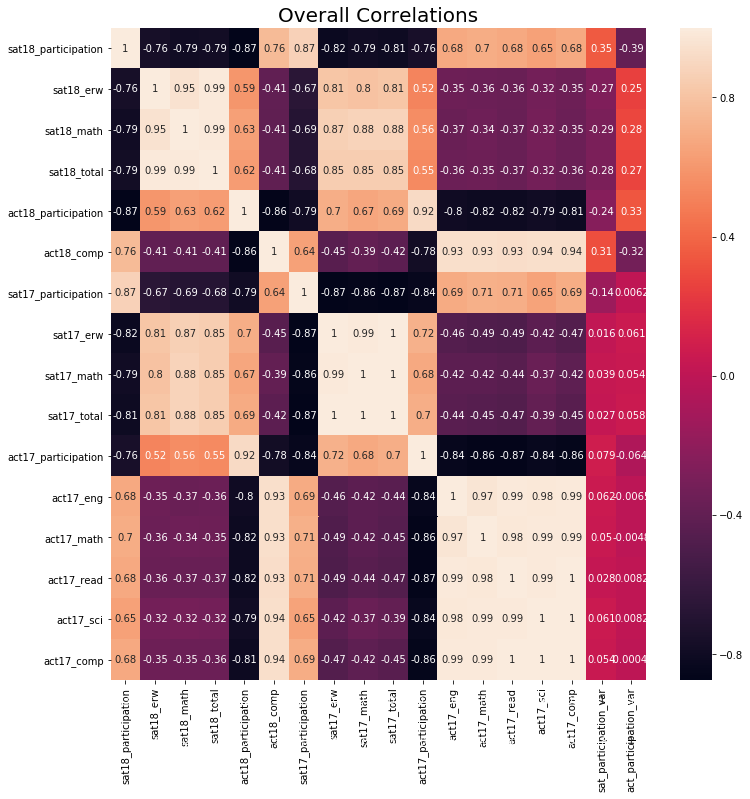

In [46]:
# plotting heatmap
plt.figure(figsize = (12,12))
ax = plt.axes()
sns.heatmap(final_merge.corr(), annot = True, ax= ax)
ax.set_title('Overall Correlations', fontsize = 20)

#to fix the top and bottom rows' cut off issue
ax.get_ylim()
ax.set_ylim(16,0);

### <font color='brown'> Correlation observations

Looking at participation rates for a start, it is observed that **SAT participation rates for both years have a strong negative correlation with ACT participation rates**. They are at -84% in 2017 and -87% in 2018. This means that states that have high SAT participation rates tend to have low ACT participation rates and vice versa.

Another interesting obeservation is the **strong negative correlation between test scores and its' participation rates**. For SATs, the correlation between average of total score vs. participation was -84% in 2017 and -80% in 2018. For the ACT, they were -86% in both years. This indicates the fact that the higher the participation rate, the lower the average. This may be because students taking up SATs or ACTs in a state where it is not required would be only highly motivated & prepared students. States where the tests are a requirement gives high participation rates but also bring in a wider range of student skills that results in lowering the overall average score.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

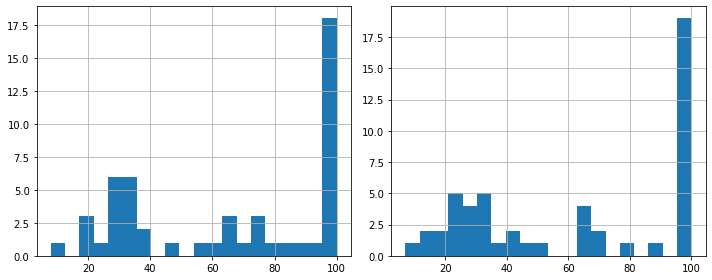

In [68]:
# Manual plotting
# Participation rates for ACTs 17 and 18
# plt.figure(figsize = (10,4))
# plt.subplot(1,2,1)
# final_merge.act17_participation.hist(bins=20);

# plt.subplot(1,2,2)
# final_merge.act18_participation.hist(bins=20);
# plt.tight_layout() 
# plt.show()

In [37]:
## new function created to plot 4 histograms in 1 figure and adjust the color of the histograms & padding size b/n rows
def subplot_histogram(dataframe, list_of_columns, list_of_titles, list_of_xlabels,figsize,sharey=True):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize = figsize, nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.tight_layout(pad = 4.0)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color = 'lightpink') # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

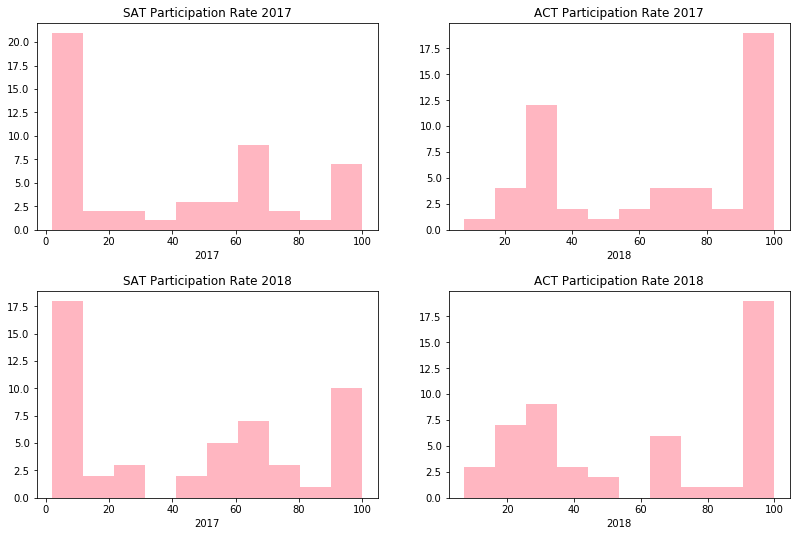

In [38]:
subplot_histogram(final_merge,['sat17_participation','act17_participation','sat18_participation','act18_participation'],
                   ['SAT Participation Rate 2017','ACT Participation Rate 2017','SAT Participation Rate 2018',
                    'ACT Participation Rate 2018'],
                   ['2017','2018','2017','2018'],(12,8))

In [26]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,figsize,sharey=True):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize = figsize, nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

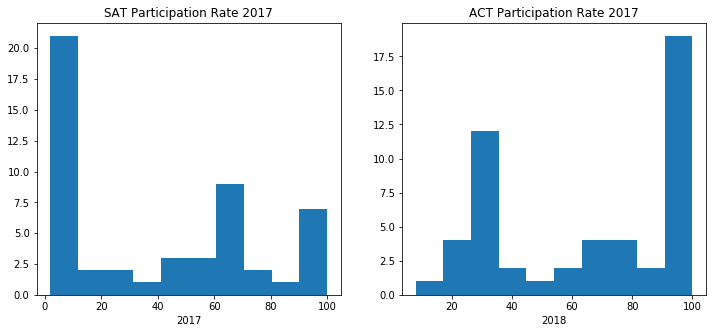

In [30]:
subplot_histograms(final_merge,['sat17_participation','act17_participation'],['SAT Participation Rate 2017','ACT Participation Rate 2017'],
                   ['2017','2018'],(12,5))

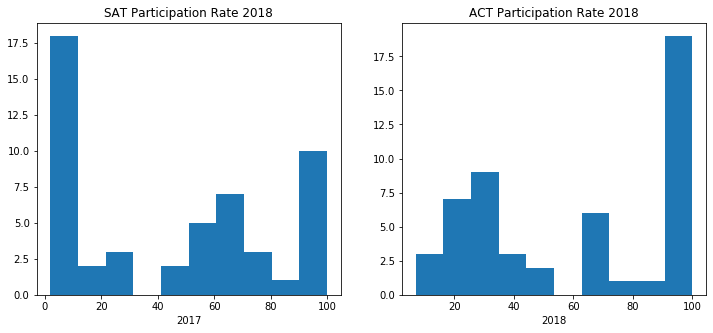

In [49]:
subplot_histograms(final_merge,['sat18_participation','act18_participation'],['SAT Participation Rate 2018','ACT Participation Rate 2018'],
                   ['2017','2018'],(12,5));

### <font color='brown'> Participation rates

It is observed that the **distribution of participation rates hasn't changed much over the 2 years**. 

It is also apparent from the histograms that for both tests, **there are states with either very high or very low participation but little in between.** This suggests that majority of the **students in these states takes up only 1 course or the other.** Very few states have 50% particiaption for both tests. 

The histograms also suggest **the success of ACT with large number of states nearing 100% participation and almost 0 states with lowest participation**. On the contrary, SATs shows us a different picture. There are **large number of states with very low participation rates and lower number of stores with high participation rate**. It is also worth noting that **there is a slight increase the number of states achiving close to 100% participation rate for SAT** in 2018 compared to 2017. 

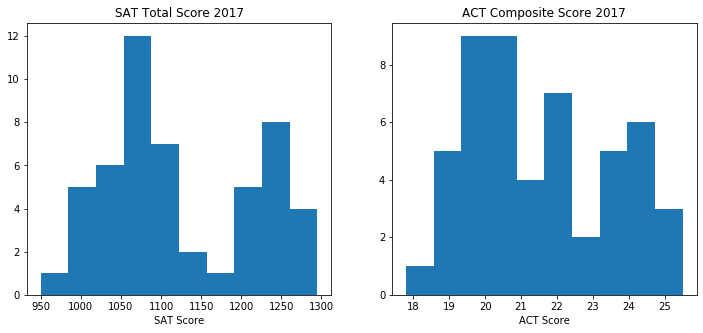

In [50]:
subplot_histograms(final_merge,['sat17_total','act17_comp'],['SAT Total Score 2017','ACT Composite Score 2017'],
                   ['SAT Score','ACT Score'],(12,5))

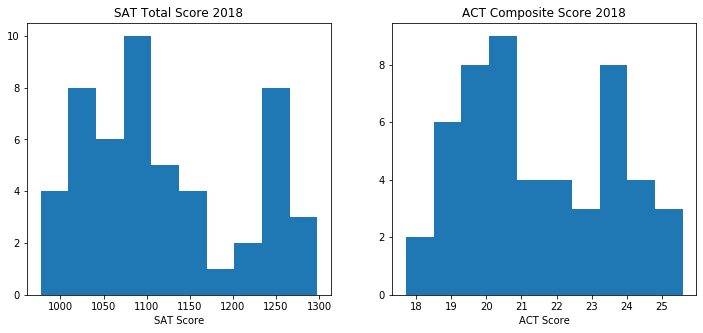

In [51]:
subplot_histograms(final_merge,['sat18_total','act18_comp'],['SAT Total Score 2018','ACT Composite Score 2018'],
                   ['SAT Score','ACT Score'],(12,5))

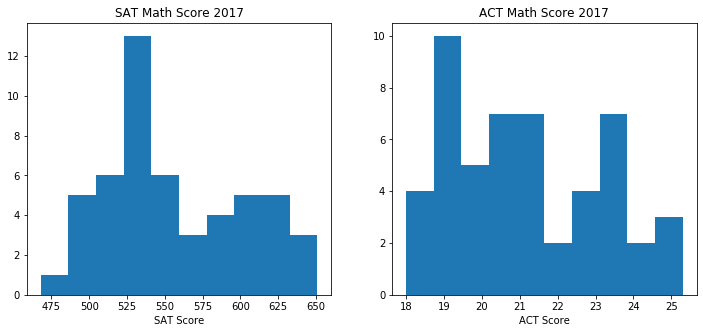

In [52]:
subplot_histograms(final_merge,['sat17_math','act17_math'],['SAT Math Score 2017','ACT Math Score 2017'],
                   ['SAT Score','ACT Score'],(12,5))

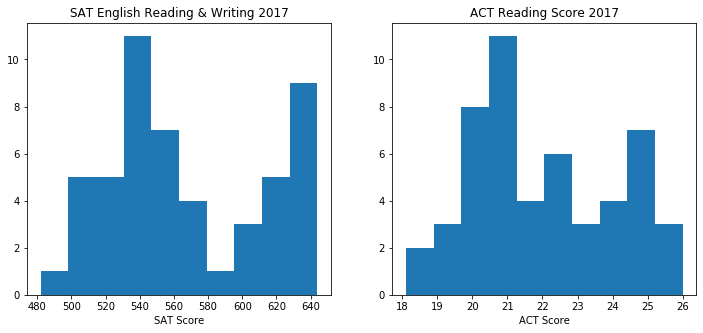

In [54]:
subplot_histograms(final_merge,['sat17_erw','act17_read'],['SAT English Reading & Writing 2017','ACT Reading Score 2017'],
                   ['SAT Score','ACT Score'],(12,5))

### <font color='brown'>Math scores (both Math & ERW)

SAT Math score seems slightly bimodal, with a peak around 535 and a smaller peak in 600s and a valley around 570s. This suggests that there are **2 clusters of states one with high score and the other relatively lower**. The former may be coming from states with lower participatin rates as seen from the correlation mentioned above. It is also interesting to see there are relatively **higher number of states scoring max scores (2nd peak) in english than maths for SAT**. 

Similar to the SATs it appears that there may be **2 clusters of scores one from the high participation state scores and another from low participation state scores**. Other sections of the tests reflects similar distribution pattern.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


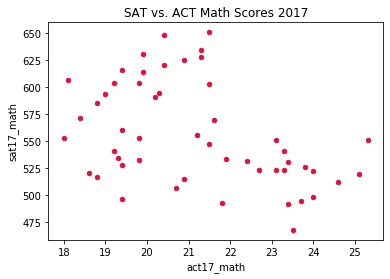

In [55]:
# SAT vs.ACT math scores for 2017
final_merge.plot(x='act17_math', y='sat17_math', kind='scatter',
           color='crimson', figsize=(6,4), title = "SAT vs. ACT Math Scores 2017");

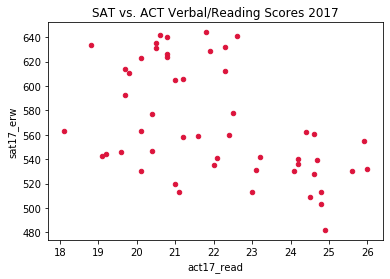

In [118]:
# SAT vs. ACT verbal/reading scores for 2017
final_merge.plot(x='act17_read', y='sat17_erw', kind='scatter',color='crimson', 
                 figsize=(6,4), title = "SAT vs. ACT Verbal/Reading Scores 2017") ;

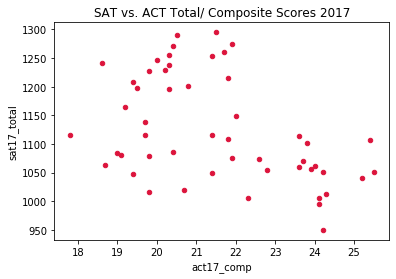

In [119]:
# SAT vs. ACT total/composite scores for 2017
final_merge.plot(x='act17_comp', y='sat17_total', kind='scatter',color='crimson', 
                 figsize=(6,4), title = "SAT vs. ACT Total/ Composite Scores 2017") ;

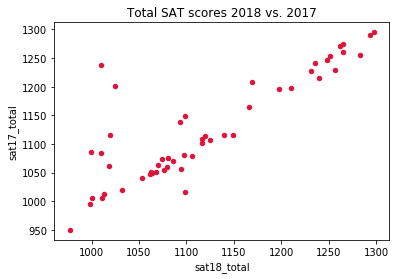

In [58]:
# Total scores for SAT 2017 vs. 2018
final_merge.plot(x='sat18_total', y='sat17_total', kind='scatter',color='crimson', 
                 figsize=(6,4), title = "Total SAT scores 2018 vs. 2017") ;

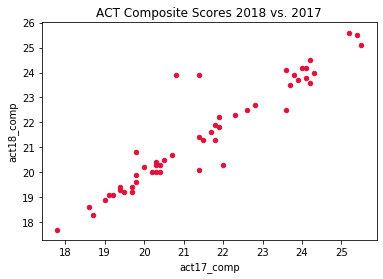

In [59]:
# Composite scores for ACT 2017 vs. 2018
final_merge.plot(x='act17_comp', y='act18_comp', kind='scatter',color='crimson', 
                 figsize=(6,4), title = "ACT Composite Scores 2018 vs. 2017") ;

### <font color='brown'> Scores

SAT and ACT scores portray **faint negative correlation showing higher SAT scores with lower ACT scores**. This will require additional analysis to understand why to come to a conclusion. 

One possible explanation may the found in the participation rates. **High SAT scores - Low SAT Particiation - High ACT Participation - Lower ACT scores**. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

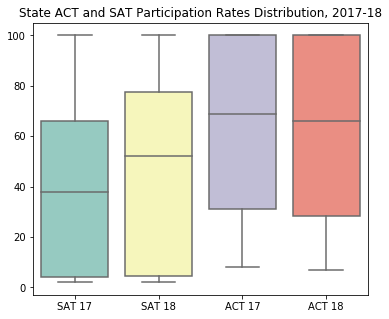

In [120]:
# Boxplot of SAT & ACT participation rates' distribution
participation_rates = final_merge.loc[:,['sat17_participation','sat18_participation','act17_participation','act18_participation']]
participation_rates = participation_rates.rename(columns={
	'sat17_participation':'SAT 17',
	'sat18_participation':'SAT 18',
	'act17_participation':'ACT 17',
	'act18_participation':'ACT 18'
})
plt.figure(figsize=(6,5))
plt.title('State ACT and SAT Participation Rates Distribution, 2017-18')
sns.boxplot(data=participation_rates,orient='v',palette='Set3');

### <font color='brown'> Participation rates

The distribution of ACT participation rate is centered significantly higher than that of the SAT. 
<br>
<br>

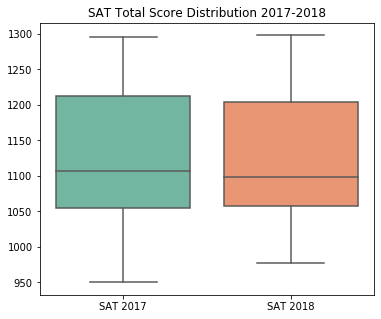

In [121]:
sat_total_scores = final_merge.loc[:,['sat17_total','sat18_total']]
sat_total_scores = sat_total_scores.rename(columns={
    'sat17_total':'SAT 2017',
    'sat18_total':'SAT 2018'})
plt.figure(figsize=(6,5))
plt.title('SAT Total Score Distribution 2017-2018')
sns.boxplot(data=sat_total_scores,orient='v',palette='Set2');

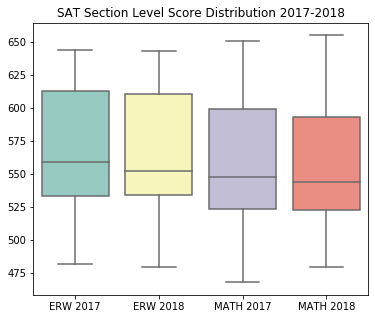

In [122]:
sat_scores = final_merge.loc[:,['sat17_erw','sat18_erw','sat17_math','sat18_math']]
sat_scores = sat_scores.rename(columns={
    'sat17_erw':'ERW 2017',
    'sat18_erw':'ERW 2018',
    'sat17_math':'MATH 2017',
    'sat18_math': 'MATH 2018' 
})
plt.figure(figsize=(6,5))
plt.title('SAT Section Level Score Distribution 2017-2018')
sns.boxplot(data=sat_scores,orient='v',palette='Set3');

### <font color='brown'>SAT Section scores

Comparing the 2 years of section scores available, it in interesting to see that the distribution of scores for Math is marginally lower that English and seems to be dipping in 2018 in comparison with 2017. This is also reflected in the total scores for SAT above. 
<br>
<br>

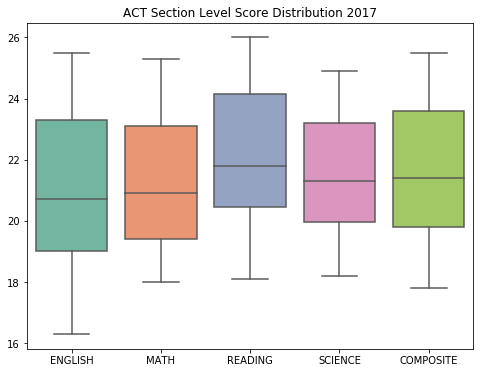

In [123]:
# Boxplot of ACT participation rates' distribution
act_scores = final_merge.loc[:,['act17_eng','act17_math','act17_read','act17_sci','act17_comp']]
act_scores = act_scores.rename(columns={
    'act17_eng':'ENGLISH',
    'act17_math':'MATH',
    'act17_read':'READING',
    'act17_sci':'SCIENCE',
    'act17_comp': 'COMPOSITE'  
})
plt.figure(figsize=(8,6))
plt.title('ACT Section Level Score Distribution 2017')
sns.boxplot(data=act_scores,orient='v',palette='Set2');

In [72]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 19 columns):
state                    51 non-null object
sat18_participation      51 non-null float64
sat18_erw                51 non-null int64
sat18_math               51 non-null int64
sat18_total              51 non-null int64
act18_participation      51 non-null float64
act18_comp               51 non-null float64
sat17_participation      51 non-null float64
sat17_erw                51 non-null int64
sat17_math               51 non-null int64
sat17_total              51 non-null int64
act17_participation      51 non-null float64
act17_eng                51 non-null float64
act17_math               51 non-null float64
act17_read               51 non-null float64
act17_sci                51 non-null float64
act17_comp               51 non-null float64
sat_participation_var    51 non-null float64
act_participation_var    51 non-null float64
dtypes: float64(12), int64(6), object(1)
memory usage: 

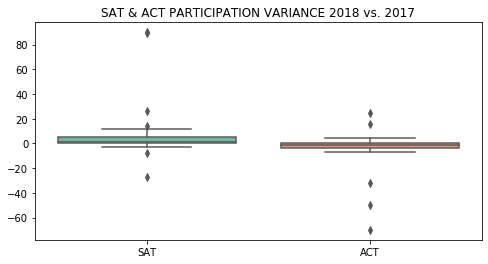

In [42]:
sat_scores = final_merge.loc[:,['sat_participation_var','act_participation_var']]
sat_scores = sat_scores.rename(columns={
    'sat_participation_var':'SAT',
    'act_participation_var':'ACT'})
plt.figure(figsize=(8,4))
plt.title('SAT & ACT PARTICIPATION VARIANCE 2018 vs. 2017')
sns.boxplot(data=sat_scores,orient='v',palette='Set2');

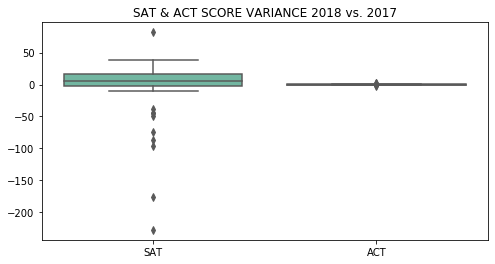

In [52]:
sat_scores_var = final_merge.loc[:,['sat_score_var','act_score_var']]
sat_scores_var = sat_scores_var.rename(columns={
    'sat_score_var':'SAT',
    'act_score_var':'ACT'})
plt.figure(figsize=(8,4))
plt.title('SAT & ACT SCORE VARIANCE 2018 vs. 2017')
sns.boxplot(data=sat_scores_var,orient='v',palette='Set2');

### <font color='brown'>Change in Participation rate

The box plot above clearly shows the increase in participation rate for SAT in 2018 vs. 2017. The reverse is true for SAT. 
<br>
<br>

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [64]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 19 columns):
state                    51 non-null object
sat18_participation      51 non-null float64
sat18_erw                51 non-null int64
sat18_math               51 non-null int64
sat18_total              51 non-null int64
act18_participation      51 non-null float64
act18_comp               51 non-null float64
sat17_participation      51 non-null float64
sat17_erw                51 non-null int64
sat17_math               51 non-null int64
sat17_total              51 non-null int64
act17_participation      51 non-null float64
act17_eng                51 non-null float64
act17_math               51 non-null float64
act17_read               51 non-null float64
act17_sci                51 non-null float64
act17_comp               51 non-null float64
sat_participation_var    51 non-null float64
act_participation_var    51 non-null float64
dtypes: float64(12), int64(6), object(1)
memory usage: 

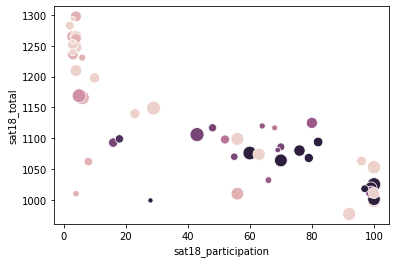

In [67]:
# sample bubble chart
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="sat18_participation", y="sat18_total",
                     hue="sat_participation_var", size="state",
                     sizes=(20, 200), hue_norm=(0, 7),legend= False, data=final_merge)    

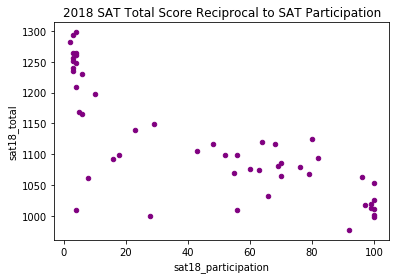

In [125]:
# To portray correlation between SAT participation rate and SAT total score 
final_merge.plot(x='sat18_participation', y='sat18_total', kind='scatter',color='purple', 
                 figsize=(6,4), title = "2018 SAT Total Score Reciprocal to SAT Participation") ;

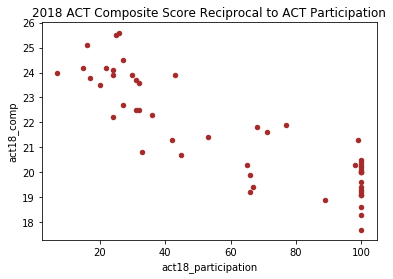

In [126]:
# To portray correlation between SAT participation rate and SAT total score 
final_merge.plot(x='act18_participation', y='act18_comp', kind='scatter',color='brown', 
                 figsize=(6,4), title = "2018 ACT Composite Score Reciprocal to ACT Participation") ;

In [ ]:
# library & dataset
 
# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Use it with a call in cmap
plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu", alpha=0.4, edgecolors="grey", linewidth=2)
 
# You can reverse it:
plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu_r", alpha=0.4, edgecolors="grey", linewidth=2)
 
# OTHER: viridis / inferno / plasma / magma
plt.scatter(x, y, s=z*2000, c=x, cmap="plasma", alpha=0.4, edgecolors="grey", linewidth=2)


### <font color='brown'> Correlation between Mean Scores and Participation Rates

The above scatter plots are to portray the message that was mentioned several times above. It clearly demonstrates the relationship between test scores and their participation rates. For both tests, the lower the participation rate, the higher the score. This is due to selection bias. The downward slope indicates the negative association between these variables. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [167]:
final_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat18_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat18_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat18_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act18_participation,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act18_comp,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


###### Answers:

<font color='brown'> **All variables' Distribution Characteristics** </font>

SAT Participation rates: Right skewed <br>
SAT Participation rates: Left skewed <br>
SAT Total scores: bimodal <br>
ACT Composite scores : bimodal <br>
SAT Math scores : bimodal <br>
ACT Math score (2017) : bimodal <br>
SAT ERW scores : bimodal <br>
ACT Reading (2017): bimodal <br>
ACT Math (2017): bimodal <br>
ACT English (2017): bimodal <br>
ACT Science (2017): bimodal <br>
SAT Participation rate variance: Centered to 0 <br>
ACT Participation rate variance: Centered to 0

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

###### Answer: 

<font color='brown'> From histograms plotted above, none of them follow a Normal distribution.

The participation rates do not seem to be centrally distributed around its mean. In fact, SAT participation rate is right skewed with several data points close to lower limits and ACT participation data points closer to upper limits. These characteristics are not consistent with a normal distribution. The *central tendency* measures further supports this argument. The mean and median of all these variables aren't close enough to the prove the normality.

The KDE distribution plots below shows that the distributions do not visually follow a normal.</font>

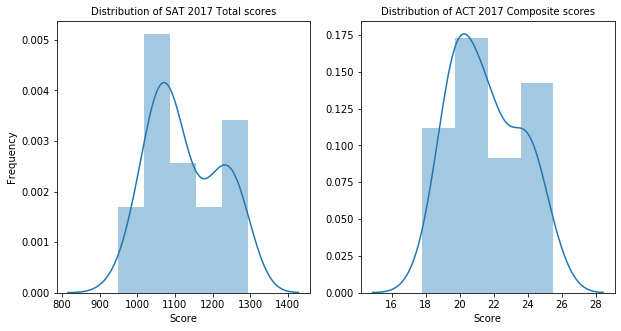

In [127]:
fig, ax = plt.subplots(figsize = (10,5), nrows = 1, ncols = 2)
ax[0] = sns.distplot(final_merge["sat17_total"], ax = ax[0])
ax[0].set_title("Distribution of SAT 2017 Total scores", fontsize = 10)
ax[0].set_xlabel("Score", fontsize = 10)
ax[0].set_ylabel("Frequency", fontsize = 10)

ax[1] = sns.distplot(final_merge["act17_comp"], ax = ax[1])
ax[1].set_title("Distribution of ACT 2017 Composite scores", fontsize = 10)
ax[1].set_xlabel("Score", fontsize = 10);

In [194]:
print(final_merge.sat17_total.median())
print(final_merge.sat17_total.mean())

1107.0
1126.0980392156862


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

###### Answer:
<font color='brown'> It was concluded above that because of selection bias in state to state participation score, probability distributions wouldn't be normal. </font>

#### Estimate Limits of Data

<font color='brown'> The data can be used to understand the relationship between participation rates and the respective tests' scoring. Limits diving deeper into the test score comparisons. <font color='brown'>

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

###### Answer:
<font color='brown'>Since the participation rates do not follow a normal distribution, statistical inference comparisons between variables that rely on the normal wouldn't be valid. </font>

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

##### Answer: 
<font color='brown'>Since these scores come from 2 different tests scored with different methodologies, it wouldn't be appropriate to compare the 2. </font>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

References<br>
*Increase in SAT participation scores* : https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html <br>
*SAT mandatory states* : https://blog.prepscholar.com/which-states-require-the-sat <br>
*More on Florida* : https://magoosh.com/hs/college-admissions/2018/university-of-florida-admissions-the-sat-act-scores-and-gpa-you-need-to-get-in/ , https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html

<font color='brown'> Illinois and Colorado - SAT mandated in 2016-2017. <br>
Florida - Participation rate for both SAT and ACT dropped in 2018 vs. 2017. External research didn't help with much in understanding this drop. Rather they indicate the number of test takers increased. </font>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<font color='brown'>The ACT and SAT participation distributions mirrors each other, with **states preferring one test or the other** based on the mandate in the state. ACT shows a **large group of high scoring states**, and **a higher base participation nationwide** with only 5 state scoring <25% participation rate. ACT has a **large cluster of states at 100% participation**. SAT, however shows a **larger group of states with <10% particpation** and then a cluster of states with 50%-75% participation rates, as well as a smaller set of high scoring states. This speaks of the success of ACT.

**ACT and SAT scores have strong negative correlation with their respective participation rates**. This is likely due to selection bias, as low participation means those who are participating appears to be high scorers, and high participation means weaker quality of performance.

The SAT made clear gains in 2018 relative to the ACT. The states contributing to these gains come from **8%-15% participation range in 2017, or around the 70% range**, in the distribution of SAT participation rate by state. **Targeting states with lower participation rate for SATs in 2018 where ACT is currently not mandated** would be promising opportunity for the College Board to invest in the near future.</font>